In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, plot_confusion_matrix, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [7]:
data=pd.read_csv('C:/Users/..../Downloads/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# check for NA values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# more info on 'class' (Fraudulant = 0, original = 1)
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We see an imbalance between the two classes. Next let us investigate the highest dollar amount of fraudulant activity.

In [19]:
max(data.Amount[data.Class==1])

2125.87

In [15]:
max(data.Amount[data.Class==0])

25691.16

The max $ of fraudulant activity is 10 times smaller than the original transaction amount. Hence, it is difficult to pinpoint such transactions.

Text(0.5, 1.0, 'Scatterplot of fraudulant transaction amounts over time')

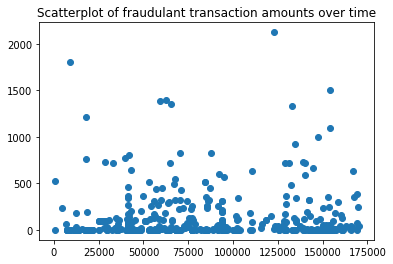

In [31]:
# visualtization of fraudulant transaction over time
plt.scatter(data.Time[data.Class==1], data.Amount[data.Class==1])

plt.title('Scatterplot of fraudulant transaction amounts over time')


Correlation matrix between variables

<AxesSubplot:>

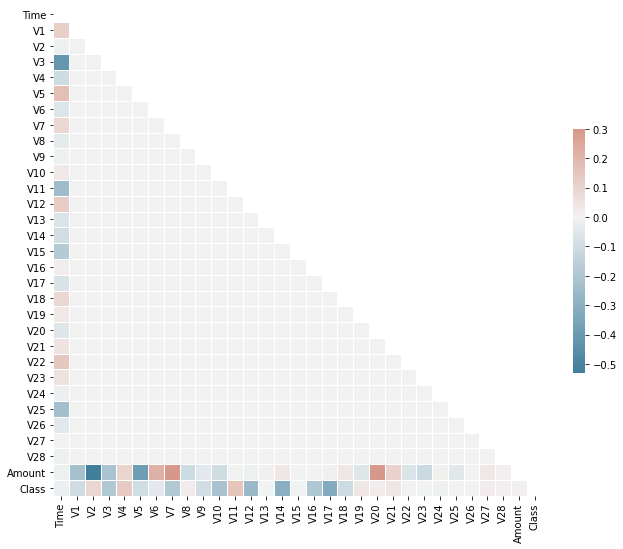

In [37]:
cor_df=data.corr()
# Generate a mask for the upper triangle       #source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(cor_df, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

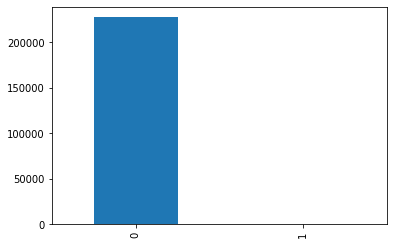

In [50]:
# Data split into training and test set
X= data.drop('Class', axis =1)
y = data.Class
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
#visualization of Class data after spliyying dataset into train and test
y_train.value_counts().plot(kind='bar')

We still see a huge imbalance between the two class types. To overcome this problem, we will apply a standardization to the dataset.

<AxesSubplot:>

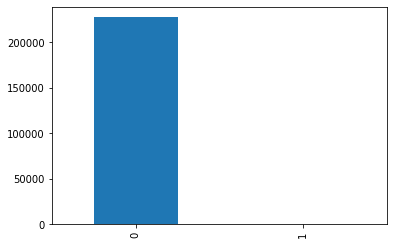

In [53]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_train.shape, X_test.shape
#visualize again to see if there is huge imbalance in data
y_train.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'distribution of Class (0 ,1) in rebalanced dataset')

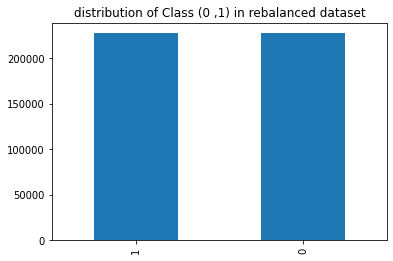

In [61]:
# use SMOTE (an over-sampling technique) to bring balance 
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=20)
X_train, y_train=sm.fit_resample(X_train, y_train)
#visualization 
y_train.value_counts().plot(kind='bar')
plt.title('distribution of Class (0 ,1) in rebalanced dataset')

In [66]:
# Modeling
models={'LR':LogisticRegression(),
        'SGD':SGDClassifier(),
        'Tree':DecisionTreeClassifier(), 
        'Per':Perceptron()}
def fit_model(models, X_train, X_test, y_train, y_test):
    score={}
    np.random.seed(20)
    for x, model in models.items():
        model.fit(X_train,y_train)
        score[x]=model.score(X_test,y_test)
    return score
    
model_score=fit_model(models, X_train,X_test,y_train,y_test)
model_score


{'LR': 0.976896878620835,
 'SGD': 0.9784066570696254,
 'Tree': 0.9975773322565921,
 'Per': 0.8797443909975071}

Based on the scores, DecisionTree and SGDClassifier performed best among others.

Text(0.5, 1.0, 'Comparing the accuracy of various models')

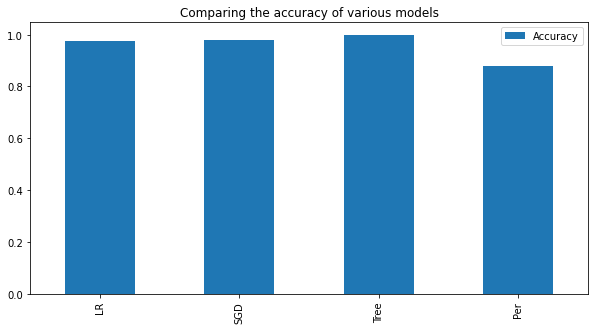

In [72]:
#visualization of model scores
score_model = pd.DataFrame(model_score, index=['Accuracy'])
score_model.T.plot.bar(figsize=(10,5))
plt.title('Comparing the accuracy of various models')

In [78]:
# Precision scores
#LR
model1= LogisticRegression()
model1.fit(X_train,y_train)
y_pred1= model1.predict(X_test)
precision_LR = precision_score(y_test, y_pred1)

#SGD
model2= SGDClassifier()
model2.fit(X_train,y_train)
y_pred2= model2.predict(X_test)
precision_SGD = precision_score(y_test, y_pred2)

#Tree
model3= DecisionTreeClassifier()
model3.fit(X_train,y_train)
y_pred3= model3.predict(X_test)
precision_Tree = precision_score(y_test, y_pred3)

#Perceptron
model4= Perceptron()
model4.fit(X_train,y_train)
y_pred4= model4.predict(X_test)
precision_Per = precision_score(y_test, y_pred4)

In [95]:
precision_model = [precision_LR,precision_SGD, precision_Tree, precision_Per]
print(precision_model)


[0.05763688760806916, 0.060092449922958396, 0.3670212765957447, 0.011416184971098265]


In [79]:
# Confusion matrix
conf_LR = confusion_matrix(y_test, y_pred1)
conf_SGD = confusion_matrix(y_test, y_pred2)
conf_Tree = confusion_matrix(y_test, y_pred3)
conf_Per = confusion_matrix(y_test, y_pred4)

Text(0.5, 1.0, 'Confusion matrix of LogisticRegression classifier')

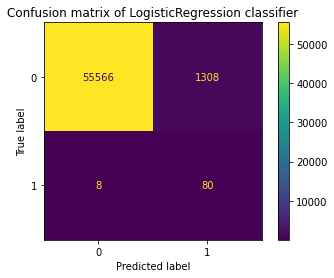

In [84]:
#Confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd(conf_LR, display_labels=model1.classes_).plot()
plt.title('Confusion matrix of LogisticRegression classifier')

Text(0.5, 1.0, 'Confusion matrix of SGDClassifier classifier')

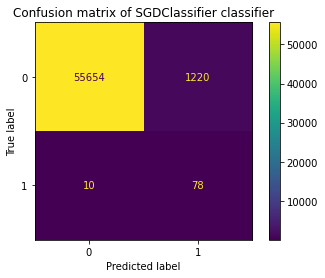

In [85]:
cmd(conf_SGD, display_labels=model2.classes_).plot()
plt.title('Confusion matrix of SGDClassifier classifier')

Text(0.5, 1.0, 'Confusion matrix of DecisionTree classifier')

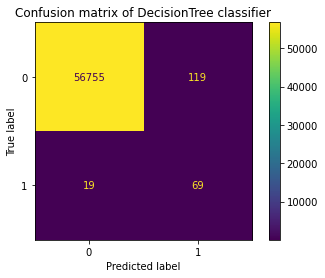

In [86]:
cmd(conf_Tree, display_labels=model3.classes_).plot()
plt.title('Confusion matrix of DecisionTree classifier')

Text(0.5, 1.0, 'Confusion matrix of Perceptron classifier')

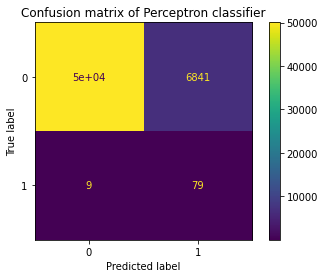

In [87]:
cmd(conf_Per, display_labels=model4.classes_).plot()
plt.title('Confusion matrix of Perceptron classifier')

Based on all the results, we can say that DecisionTree model performed the best.